# Model Evaluation and Refinement

Part of Data Analysis with Python course provided by IBM through Cognitive Course. This is module 5, in module 4, we've developed models to predict `price` of cars, now the **objectives** of this module is to:
- Evaluate and refine the prediction models.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('module_5_auto.csv')

In [2]:
# let's only use numeric data
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


#### Function for Plotting

In [3]:
def distPlot(RedFunc, BlueFunc, RedName, BlueName, Title):
    width, height = 12, 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunc, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunc, color="b", label=BlueName,
                     ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()

In [4]:
def polyPlot(xtrain, xtest, ytrain, ytest, lr, polyTrans):
    width, height = 12, 10
    plt.figure(figsize=(width, height))
    
    # training and testing data
    # lr: linear regression object
    # polyTrans: polynomial transformation object
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, ytrain, 'ro', label="Training Data")
    plt.plot(xtest, ytest, 'go', label="Test Data")
    plt.plot(x, lr.predict(polyTrans.fit_transform(x.reshape(-1,1))), label="Predicted Function")
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Part 1: Training and Testing
An important step in testing your model is to split your data into training and testing data. We will place the target data `price` in a separate dataframe `y_data`.

In [5]:
y_data = df['price']

In [6]:
# drop `price` data from dataframe x_data
x_data = df.drop('price', axis=1)

Now, we randomly split our data into training and testing data using `train_test_split` function.

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

print("Number of test samples: ", x_test.shape[0])
print("Number of training samples: ", x_train.shape[0])

Number of test samples:  21
Number of training samples:  180


In [8]:
# try separate data set with test sample 40% of all data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

print("Number of test samples: ", x_test1.shape[0])
print("Number of training samples: ", x_train1.shape[0])

Number of test samples:  81
Number of training samples:  120


Now, let's import `LinearRegression` from scikit-learn library

In [9]:
from sklearn.linear_model import LinearRegression

lre = LinearRegression()

In [10]:
# fit the model using `horsepower` feature
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [11]:
# calculate R-square on the test data
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [12]:
# calculate R-square on the training data
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

We can see the R-square is much smaller using the test data compared to the training data.

In [13]:
# Now, let's see for the other data set
lre1 = LinearRegression()
lre1.fit(x_train1[['horsepower']], y_train1)

r_test = lre1.score(x_test1[['horsepower']], y_test1)
r_train = lre1.score(x_train1[['horsepower']], y_train1)

print("Training data R-square: ", r_train)
print("Test data R-square: ", r_test)

Training data R-square:  0.5754067463583004
Test data R-square:  0.7139364665406973


Sometimes we do not have sufficient testing data and as a result we may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.

### Cross-Validation Score
Let's import `cross_val_score` from scikit-learn

In [14]:
from sklearn.model_selection import cross_val_score

We input the object, the feature `horsepower`, and the target data `y_data`. The parameter `cv` determines the number of folds, in this case 4.

In [15]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R-square. Each element in the array has the average R-square value for the fold.

In [16]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [17]:
# calculate the average and standard deviation of our estimate
print("The mean of the folds are ", Rcross.mean(),
     " and the standard deviation is ", Rcross.std())

The mean of the folds are  0.522009915042119  and the standard deviation is  0.2911839444756029


In [18]:
# try using negative squared error
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4,
                    scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

We can also use the function `cross_val_predict` to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds used for training.

In [19]:
from sklearn.model_selection import cross_val_predict

In [20]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data,
                        cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Part 2: Overfitting, Underfitting, and Model Selection

It turns out that the test data, sometimes referred to as the 'out of sample data', is a much better measure of how well our model performs in the real world. One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

Let's create Multiple Linear Regression objects and train the model using `horsepower`, `curb-weight`, `engine-size`, and `highway-mpg` as features.

In [21]:
features = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']
lr = LinearRegression()
lr.fit(x_train[features], y_train)

LinearRegression()

In [22]:
# Prediction using training data
yhat_train = lr.predict(x_train[features])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [23]:
# Prediction using test data
yhat_test = lr.predict(x_test[features])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Let's perform some model evaluation using our training and testing data separately. First, we import the seaborn and matplotlib library for plotting.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's examine the distribution of the predicted values of the traing data.

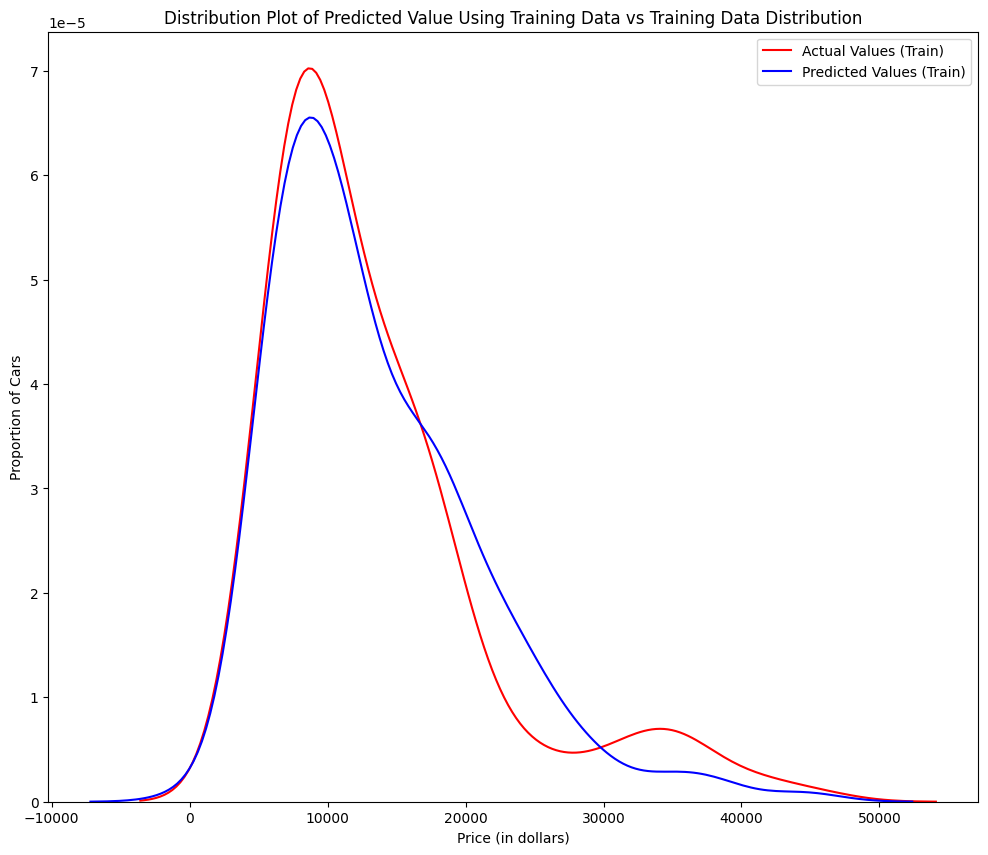

In [25]:
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
distPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.

So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

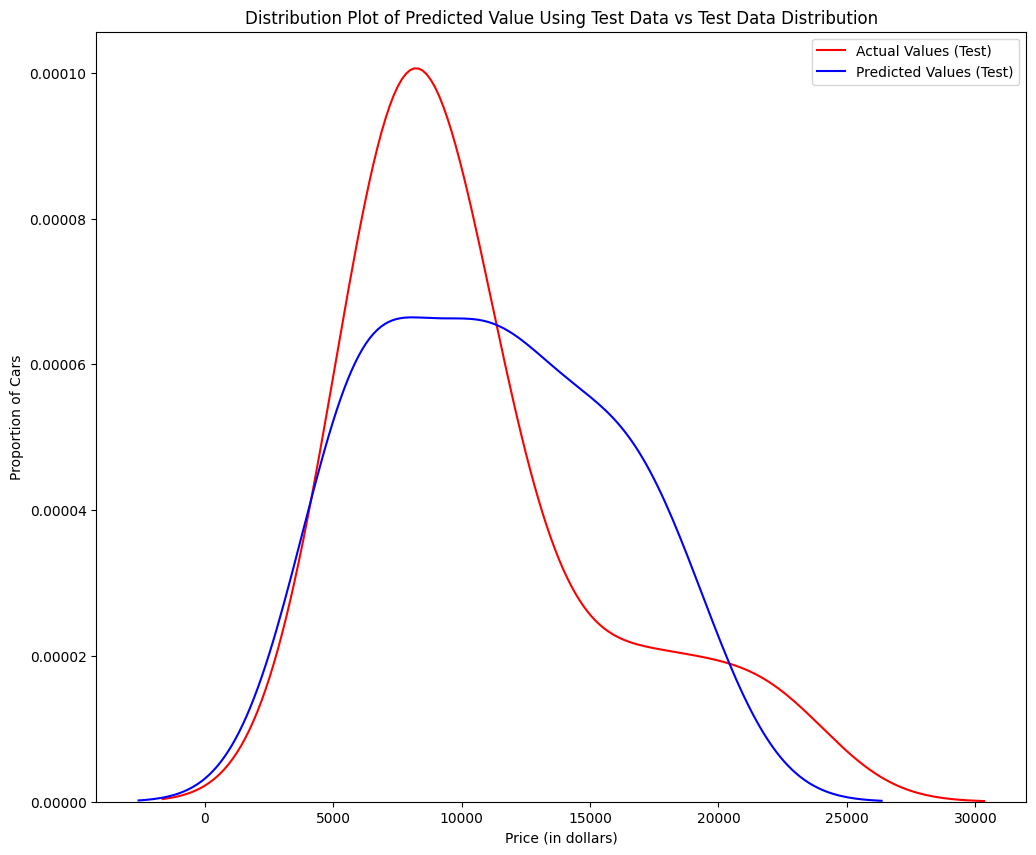

In [26]:
Title = 'Distribution Plot of Predicted Value Using Test Data vs Test Data Distribution'
distPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data

Comparing Figure 1 and 2, it is evident that the distribution of the predicted data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 20,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [27]:
from sklearn.preprocessing import PolynomialFeatures

**Overfitting**

Overfitting occurs when the model fits the noise, but not the undelying process. Therefore, when testing the model using the test set, the model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

Let's use 55% of the data for training and the rest for testing.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature `horsepower`.

In [29]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Now, let's create a Linear Regression model `poly` and train it.

In [30]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method `predict`. We assign the values to `yhat`.

In [31]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.67965875,  7308.0119838 , 12213.80910478, 18893.1997037 ,
       19995.89349921])

Let's take the first five predicted values and compare it to the actual targets.

In [32]:
print("Predicted values: ", yhat[0:4])
print("Actual values: ", y_test[0:4].values)

Predicted values:  [ 6728.67965875  7308.0119838  12213.80910478 18893.1997037 ]
Actual values:  [ 6295. 10698. 13860. 13499.]


Use the function `polyPlot` to display the training data, testing data, and the predicted function.

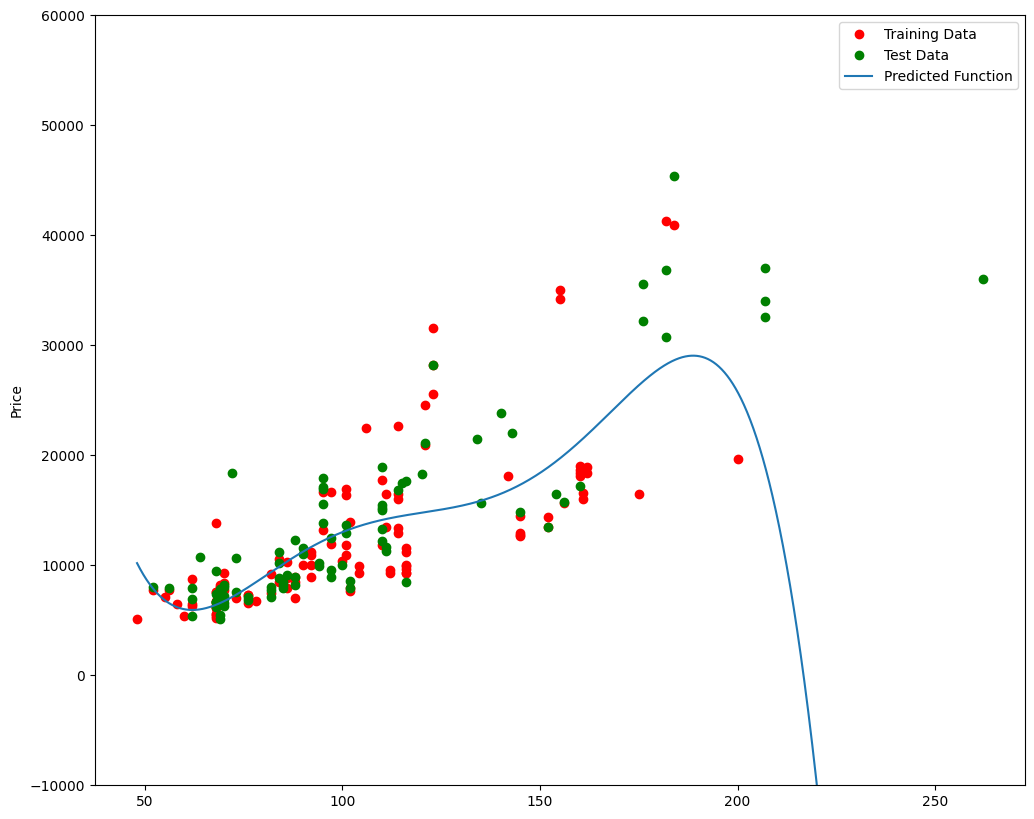

In [33]:
polyPlot(x_train['horsepower'], x_test['horsepower'], y_train,
        y_test, poly, pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the prediction model.

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [34]:
# R-square of the training data
poly.score(x_train_pr, y_train)

0.5567716902513511

In [35]:
# R-square of the test data
poly.score(x_test_pr, y_test)

-29.871476298381996

We see the R-square for the training data is $0.5567$ while the R-square for the test data is $-29.87$. The lower the R-square, the worse the model. A negative value is a sign of overfitting.

Let's see how the R-square changes on the test data for different order polynomials and then plot the results.

Text(3, 0.75, 'Maximum R-square')

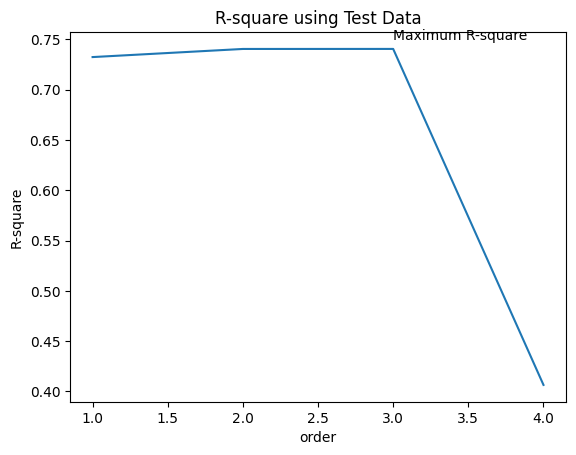

In [36]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R-square')
plt.title('R-square using Test Data')
plt.text(3, 0.75, 'Maximum R-square')

We see the R-square gradually increases until order three. Then, the value dramatically decreases at order four.

Define a new function `f`

In [37]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    polyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

The following interface allows us to experiment with different polynomial orders and different amounts of data.

In [38]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [39]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

We can perform Polynomial Transformation with more than one feature. First, create a Polynomial Feature object `pr1` of degree two.

In [41]:
pr1 = PolynomialFeatures(degree=2)

Then, transform the training and testing samples for the features `horsepower`, `curb-weight`, `engine-size`, and `highway-mpg`.

In [43]:
# All four features has been assign to 'features' list
x_train_pr1 = pr1.fit_transform(x_train[features])
x_test_pr1 = pr1.fit_transform(x_test[features])

In [44]:
# Check how many dimensions the new feature have
x_train_pr1.shape

(110, 15)

In [45]:
x_test_pr1.shape

(91, 15)

Now, we can create a linear regression model `poly1` and train it using the polynomial features.

In [46]:
poly1 = LinearRegression().fit(x_train_pr1, y_train)

Lastly, we can predict outputs on the polynomial features then use `distPlot` function to display the distribution of the predicted test output vs the actual test data.

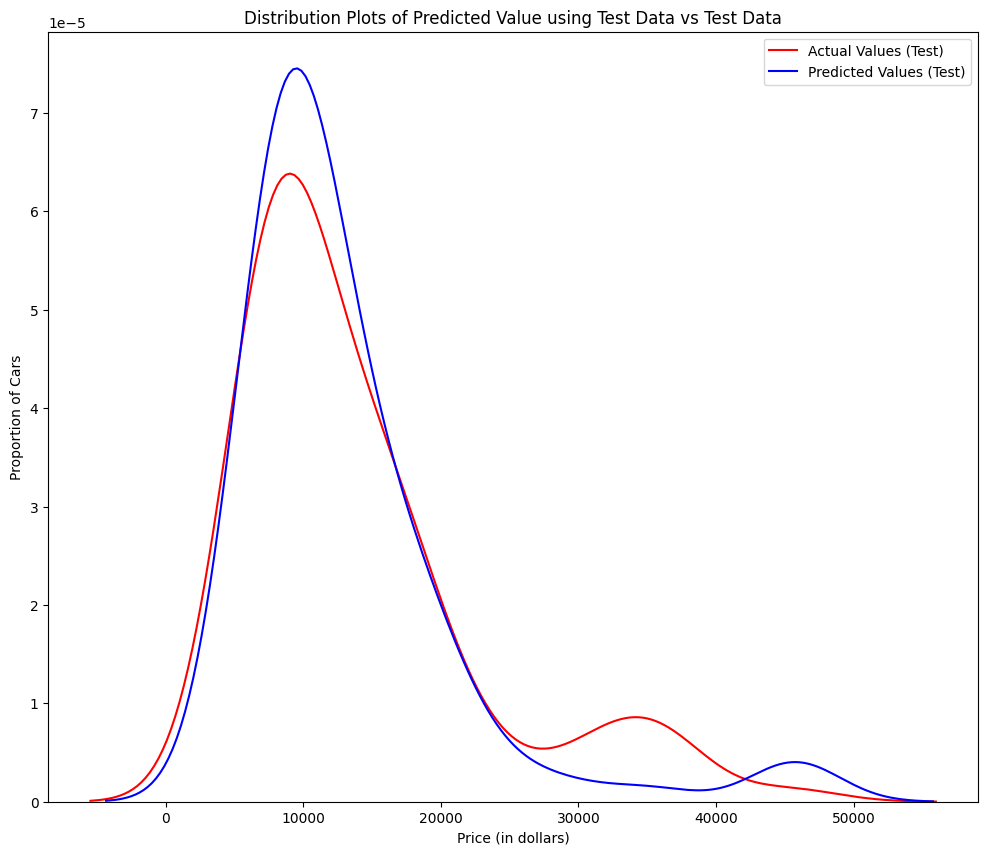

In [47]:
yhat_test1 = poly1.predict(x_test_pr1)
Title = 'Distribution Plots of Predicted Value using Test Data vs Test Data'
distPlot(y_test, yhat_test1, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

The predicted values are inaccurate at three places:
- predict higher proportion around 10,000 dollar price range,
- predict lower proportion at 30,000 to 40,000 dollar price range,
- predict higher proportion above 40,000 dollar price.

As, such our model is not accurate.

## Part 3: Ridge Regression

In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data.

In [60]:
pr = PolynomialFeatures(degree=2)
# add two feature to 'features' list
features.append('normalized-losses')
features.append('symboling')
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

In [61]:
# Import Ridge from linear models module
from sklearn.linear_model import Ridge

In [62]:
# Create Ridge regression object and
# set the regularization parameter (alpha) to 1
RigeModel = Ridge(alpha=1)

In [63]:
# Fit the model using training data
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [64]:
# Make a prediction
yhat = RigeModel.predict(x_test_pr)

In [65]:
# Now, let's compare the predicted value to the test set
print('Predicted: ', yhat[0:4])
print('Test data: ', y_test[0:4].values)

Predicted:  [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
Test data:  [ 6295. 10698. 13860. 13499.]


As shown above, the errors are high. To minimize the error, we can search for the optimum value for alpha through iteration.

In [68]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    
    test_score = RigeModel.score(x_test_pr, y_test)
    train_score = RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score,
                     "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:02<00:00, 414.17it/s, Test Score=0.564, Train Score=0.859]


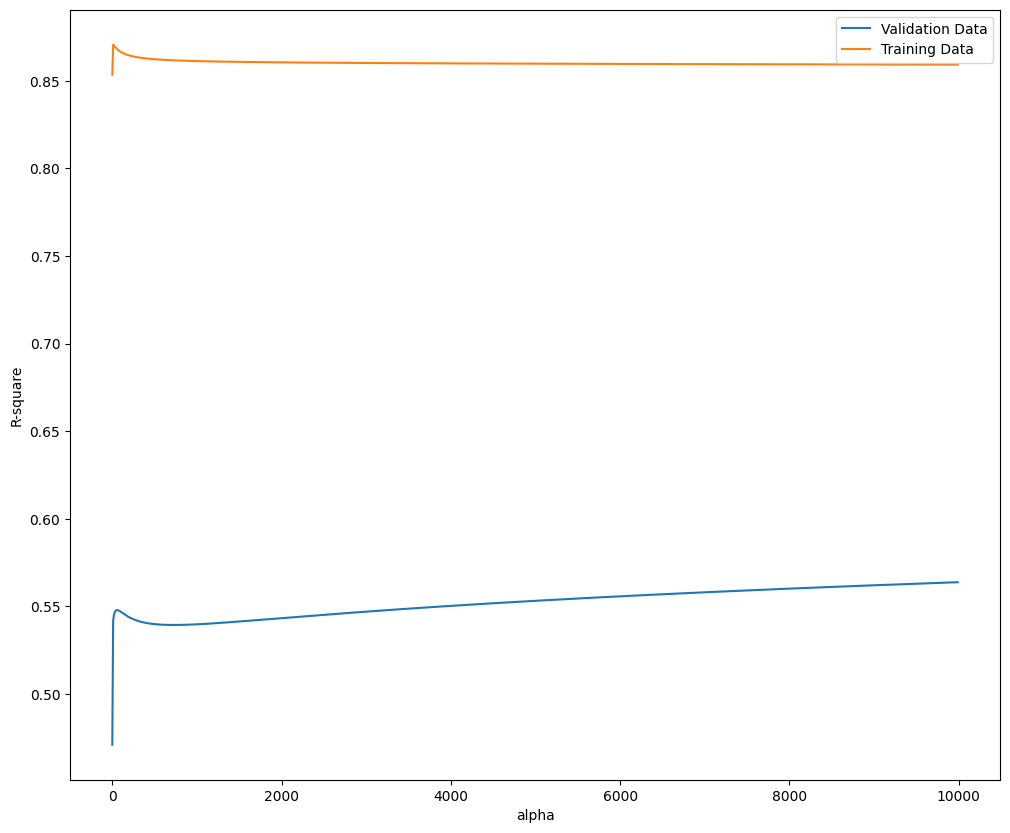

In [70]:
# Plot the R-square value
width, height = 12, 10
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label='Validation Data')
plt.plot(Alpha, Rsqu_train, label='Training Data')
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.legend()

Figure 4: R-square values of training and validation data for different alpha value.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

In [71]:
# Try using alpha=10
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206425

## Part 4: Grid Search

The term alpha is a hyperparameter. Scikit-learn has the class **GridSearchCV** to make the process of finding the best hyperparameter simpler.

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
# create a dictionary of parameter values
param1 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
param1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [74]:
# create a Ridge regression object
RR = Ridge()
RR

Ridge()

In [75]:
# create a ridge grid search object
Grid1 = GridSearchCV(RR, param1, cv=4)

In [78]:
features1 = features[0:4]
Grid1.fit(x_data[features1], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [79]:
# find the model with the best parameter values
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [80]:
# test the model
BestRR.score(x_test[features1], y_test)

0.8411649831036151

In [82]:
# let's try different approach
Grid2 = GridSearchCV(Ridge(), param1, cv=4)
Grid2.fit(x_data[features1], y_data)

best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[features1], y_data)

best_ridge_model.score(x_test[features1], y_test)

0.8411649831036151